In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/E_Commerce_Dataset_processed.csv')
df.head()


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,0,1,1,0,0,1,0,0,0,1
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,0,0,1,0,0,1,0,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,0,1,0,1,0,0,0,0,1
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,0,0,1,0,0,1,0,0,0,1


In [45]:
df['DissatisfactionIndex'] = df['Complain'] / (df['OrderCount'] + 1) * (5 - df['SatisfactionScore'])
df['DeviceToTenureRatio'] = df['NumberOfDeviceRegistered'] / (df['Tenure'] + 1)
df['InactivityRatio'] = df['DaySinceLastOrder'] / (df['Tenure'] + 1)
df['RecencyWeight'] = df['OrderCount'] / (df['DaySinceLastOrder'] + 1)
df['SpendVelocity'] = df['OrderAmountHikeFromlastYear'] / (df['DaySinceLastOrder'] + 1)

df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,DissatisfactionIndex,DeviceToTenureRatio,InactivityRatio,RecencyWeight,SpendVelocity
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,0,1,1.5,0.6,1.0,0.166667,1.833333
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,1,0,0,0,1,1.0,0.4,0.0,1.000000,15.000000
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,1,0,0,0,1,1.0,0.4,0.3,0.250000,3.500000
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,0,0,0,1,0.0,4.0,3.0,0.250000,5.750000
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,1,0,0,0,1,0.0,3.0,3.0,0.250000,2.750000


Experimented with multiple derived features. Those with very low target correlation (|r| ≤ 0.08) were excluded, as they introduced noise and provided no measurable improvement to the model’s performance.

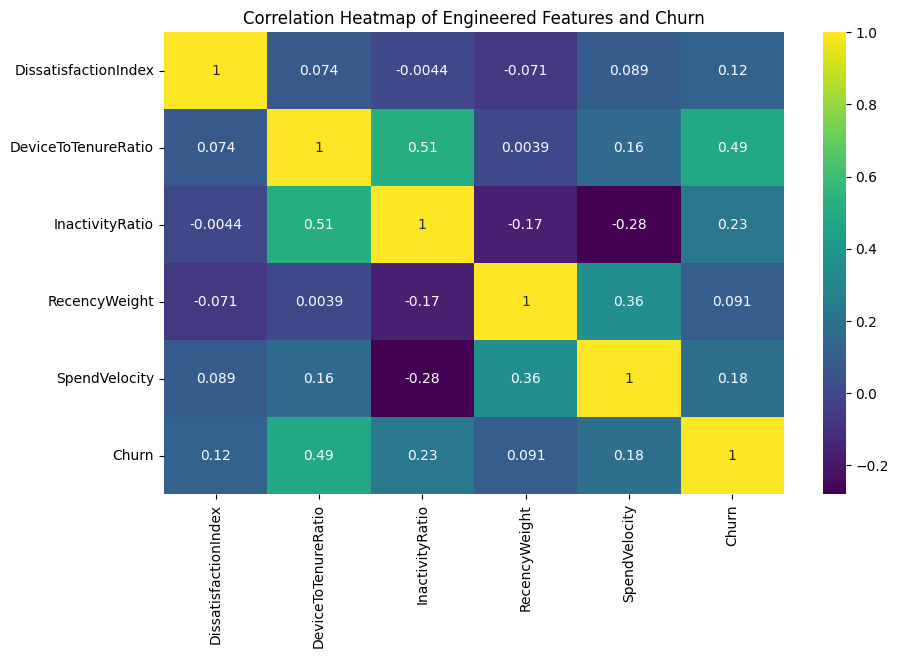

In [46]:
new_cols = ['DissatisfactionIndex','DeviceToTenureRatio','InactivityRatio','RecencyWeight','SpendVelocity']
corr = df[new_cols + ['Churn']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Engineered Features and Churn')
plt.savefig('../visuals/Engineered_Features_Correlation_Heatmap.png', bbox_inches='tight')
plt.show()

In [47]:
df.to_csv('../data/processed/E_Commerce_Dataset_processed_w_fe.csv', index=False)